#### Cody Kaminski
#### 11/23/2022
#### Project 2: Data Analysis with Python
#### The purpose of this project is to make conclusions based on analyzations of data

#### Importing pandas library and pyplot library

In [152]:
import pandas as pd
from matplotlib import pyplot as plt

#### Reading and saving csv files to variables

In [153]:
CES_FALL_2020_0 = pd.read_csv("Computing Entry Survey Fall 2020.csv")
CLCES_FALL_2020_0 = pd.read_csv("Computing Literacy Course Entry Survey Fall 2020.csv")
CES_FALL_2021_0 = pd.read_csv("Computing Entry Survey Fall 2021.csv")
CLCES_FALL_2021_0 = pd.read_csv("Computing Literacy Course Entry Survey Fall 2021.csv")

#### Copying original dataframe to new variable

In [166]:
CES_FALL_2020_1 = CES_FALL_2020_0.copy()
CLCES_FALL_2020_1 = CLCES_FALL_2020_0.copy()
CES_FALL_2021_1 = CES_FALL_2021_0.copy()
CLCES_FALL_2021_1 = CLCES_FALL_2021_0.copy()

dataframes1 = [CES_FALL_2020_1, CLCES_FALL_2020_1, CES_FALL_2021_1, CLCES_FALL_2021_1]

#### Removing unnecessary columns

In [167]:
CES_FALL_2020_1.drop(CES_FALL_2020_1.columns[[0, *range(16, 62, 1), *range(63, 74, 1), 75]], axis = 1, inplace = True)

CLCES_FALL_2020_1.drop(CLCES_FALL_2020_1.columns[[0, *range(2, 20, 1), *range(21, 32, 1), *range(33, 39, 1), 40]], axis = 1, inplace = True)

CES_FALL_2021_1.drop(CES_FALL_2021_1.index[245:247], inplace = True)
CES_FALL_2021_1.drop(CES_FALL_2021_1.columns[[0, *range(16, 62, 1), *range(63, 85, 1), 86]], axis = 1, inplace = True)

CLCES_FALL_2021_1.drop(CLCES_FALL_2021_1.index[122:126], inplace = True)
CLCES_FALL_2021_1.drop(CLCES_FALL_2021_1.columns[[*range(0, 6, 1), *range(7, 35, 1), *range(46, 57, 1), *range(58, 64, 1), *range(65, 74, 1), *range(77, 79, 1)]], axis = 1, inplace = True)

#### Saving column headers

In [168]:
WAYS_SET = set()

for dataframe in dataframes1:
    for column in dataframe.columns:
        if "[" and "]" in column:
            WAYS_SET.add(column[column.find("[")+1:column.find("]")].replace(" ", "_").lower())

#### Renaming column headers

In [169]:
for dataframe in dataframes1:
    dataframe.columns = [column[column.find("[")+1:column.find("]")].replace(" ", "_").lower() if "[" and "]" in column else column for column in dataframe]
    dataframe.columns = ["course" if "Which course" in column else column for column in dataframe]
    dataframe.columns = ["program" if "What degree" in column else column for column in dataframe]
    dataframe.columns = ["interest" if "interested" in column else column for column in dataframe]
    
    dataframe.rename(columns = {"Gender": "gender", "Race/ethnicity": "race", "Age ": "age"}, inplace = True)
    
CLCES_FALL_2020_1.columns = ["hear" if "hear" in column else column for column in CLCES_FALL_2020_1]

#### Cleaning data in columns

In [170]:
for dataframe in dataframes1:
    for key, value in dataframe.course.iteritems():
        dataframe.at[key, "course"] = value[0:7]
    
    for key, value in dataframe.program.iteritems():
        if "," in list(value):
            dataframe.at[key, "program"] = value[:value.index(",")]
        
    for key, value in dataframe.race.iteritems():
        if ";" in list(value):
            dataframe.at[key, "race"] = "Multi-Racial"
            
    dataframe.race = dataframe.race.str.replace("Hispanic or Latino", "Hispanic")
    dataframe.race = dataframe.race.str.replace("White/Caucasian", "White")
    dataframe.race = dataframe.race.str.replace("Black/African American", "African American")
    dataframe.race = dataframe.race.str.replace("American Indian/Native American/Alaska Native", "Native American")

#### Organization of data for graphing

In [171]:
CES_FALL_2020_2 = CES_FALL_2020_1.copy()[["program", "interest"]]
CLCES_FALL_2020_2 = CLCES_FALL_2020_1.copy()[["program", "interest"]]
CES_FALL_2021_2 = CES_FALL_2021_1.copy()[["program", "interest"]]
CLCES_FALL_2021_2 = CLCES_FALL_2021_1.copy()[["program", "interest"]]

dataframes2 = [CES_FALL_2020_2, CLCES_FALL_2020_2, CES_FALL_2021_2, CLCES_FALL_2021_2]

for dataframe in dataframes2:
    dataframe = dataframe.dropna().reset_index(drop = True)
    
interestDataFrame1 = pd.concat(dataframes2, axis = 0, ignore_index = True)
interestDataFrame2 = interestDataFrame1.groupby("program")["interest"].mean().rename_axis("program").reset_index(name = "interest")

majors = ["Computer Science", "Information Technology", "Criminal Justice", "Nursing", "ShareTime CSIP Program"]

interestDataFrame3 = interestDataFrame2[interestDataFrame2["program"].isin(majors)].dropna().reset_index(drop = True)

#### Which majors are most likely to take more information technologies courses?

<AxesSubplot:ylabel='program'>

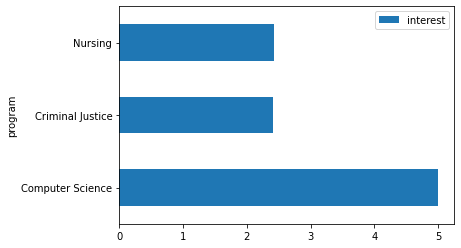

In [172]:
interestDataFrame3.plot.barh(x = "program", y = "interest")

#### Computer Science majors tend to have a higher interest on a scale from 1 to 5 in taking more information technologies courses than Nursing majors or Criminal Justice majors.

#### Organization of data for graphing

In [173]:
waysDataFrame = pd.DataFrame(columns=["Way", "Count"])

for dataframe in dataframes1:
    for WAY in WAYS_SET:
        count = 0
        
        if WAY in dataframe.columns:
            count = count + len(dataframe[dataframe[WAY] == "Yes"])
            
            if WAY in waysDataFrame.Way.values:
                waysDataFrame.loc[waysDataFrame.Way == WAY, "Count"] = waysDataFrame.loc[waysDataFrame.Way == WAY, "Count"] + count
            else:
                waysDataFrame.loc[len(waysDataFrame)] = [WAY, count]
                
for key, value in waysDataFrame.Way.iteritems():
    waysDataFrame.at[key, "Way"] = value.replace("_", " ").capitalize()

#### What ways are the most effective at enrolling students?

<AxesSubplot:ylabel='Way'>

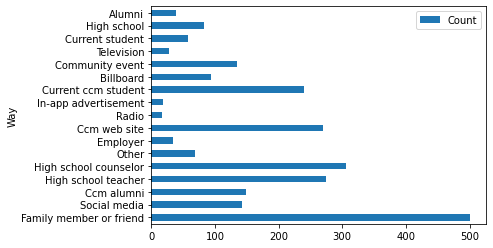

In [175]:
waysDataFrame.plot.barh(x = "Way", y = "Count")

#### Family members or friends are the most effective way of enrolling students.

#### Organization of data for graphing

In [176]:
CES_FALL_2020_3 = CES_FALL_2020_1.copy()[["gender"]]
CLCES_FALL_2020_3 = CLCES_FALL_2020_1.copy()[["gender"]]
CES_FALL_2021_3 = CES_FALL_2021_1.copy()[["gender"]]
CLCES_FALL_2021_3 = CLCES_FALL_2021_1.copy()[["gender"]]

dataframes3 = [CES_FALL_2020_3, CLCES_FALL_2020_3, CES_FALL_2021_3, CLCES_FALL_2021_3]

for dataframe in dataframes3:
    for key, value in dataframe.gender.iteritems():
        if str(value) == "Man":
            dataframe.at[key, "gender"] = "Male"
        elif str(value) == "Woman":
            dataframe.at[key, "gender"] = "Female"
            
gendersDataFrame = pd.concat(dataframes3, axis = 0, ignore_index = True)
gendersCountDataFrame = gendersDataFrame.value_counts().rename_axis("gender").reset_index(name = "count")

#### What is the breakdown by gender of these courses?

([<matplotlib.patches.Wedge at 0x19593fe9040>,
 [Text(-0.38288055651116853, 1.0312140803178058, 'Male'),
  Text(0.27634061669606724, -1.0647233741982174, 'Female'),
  Text(1.091145159800405, -0.13929192454750908, 'Prefer not to say'),
  Text(1.0992762571482677, -0.0398962463158569, 'Non-binary'),
  Text(1.0999348548016743, -0.011971432346206583, 'I do not identify')])

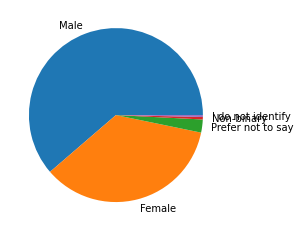

In [177]:
plt.pie(gendersCountDataFrame["count"], labels = gendersCountDataFrame["gender"])

#### The majority of the students enrolled in computing or computing literacy courses are male.

#### Organization of data for graphing

In [178]:
CES_FALL_2020_4 = CES_FALL_2020_1.copy()[["age"]]
CLCES_FALL_2020_4 = CLCES_FALL_2020_1.copy()[["age"]]
CES_FALL_2021_4 = CES_FALL_2021_1.copy()[["age"]]
CLCES_FALL_2021_4 = CLCES_FALL_2021_1.copy()[["age"]]

dataframes4 = [CES_FALL_2020_4, CLCES_FALL_2020_4, CES_FALL_2021_4, CLCES_FALL_2021_4]
            
agesDataFrame = pd.concat(dataframes4, axis = 0, ignore_index = True)
agesCountDataFrame = agesDataFrame.value_counts().rename_axis("age").reset_index(name = "count")

#### What is the breakdown by age group of these courses?

([<matplotlib.patches.Wedge at 0x1959402ef10>,
 [Text(0.4214120672735007, 1.0160767045633292, '19-20'),
  Text(-1.09434324535038, -0.11141302148311809, '18 and younger'),
  Text(-0.04980642122392797, -1.098871839845241, '21-24'),
  Text(0.8235650844113662, -0.729205424923937, '25-34'),
  Text(1.0782273230013262, -0.21777474585771875, '35-64'),
  Text(1.0998844583161538, -0.015942971949458217, '65+')])

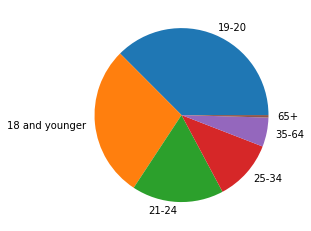

In [179]:
plt.pie(agesCountDataFrame["count"], labels = agesCountDataFrame["age"])

#### The majority of the students enrolled in computing and computing literacy courses fall into the 19-20 age group.